In [ ]:
import random                                               #importing the libraries needed
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/home/aisha/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
cust_df=pd.read_csv("only_batsman_rating.csv")                                                              #opening the dataset
cust_df= cust_df.groupby(["batsman"]).apply(lambda x: x.sort_values(["match_id"])).reset_index(drop=True)   #group by batsman and sorting the values for each batsman on the basis of their match is
cust_df

,batsman,home_team,opposition_team,venue,inning,match_id,batsman_runs,sixes,fours,half_century,century,zeros,balls,strike_rate,rating
0,A Chopra,Kolkata Knight Riders,Royal Challengers Bangalore,Eden Gardens,1,29,2,0,0,0,0,0,5,40.000000,8.0
1,A Chopra,Kolkata Knight Riders,Deccan Chargers,"Rajiv Gandhi International Stadium, Uppal",1,32,24,0,3,0,0,0,25,96.000000,8.5
2,A Chopra,Kolkata Knight Riders,Delhi Daredevils,Eden Gardens,1,35,13,0,2,0,0,0,18,72.222222,8.5
3,A Chopra,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,1,38,1,0,0,0,0,0,4,25.000000,8.0
4,A Chopra,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,2,51,2,0,0,0,0,0,3,66.666667,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Yuvraj Singh,Kings XI Punjab,Royal Challengers Bangalore,M.Chinnaswamy Stadium,1,677,4,0,1,0,0,0,4,100.000000,8.5
4905,Yuvraj Singh,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",1,681,20,1,2,0,0,0,13,153.846154,9.0
4906,Yuvraj Singh,Kings XI Punjab,Delhi Daredevils,Feroz Shah Kotla,1,691,14,0,1,0,0,0,17,82.352941,8.5
4907,Yuvraj Singh,Kings XI Punjab,Mumbai Indians,Holkar Cricket Stadium,1,703,14,1,0,0,0,0,14,100.000000,8.5


In [ ]:
df = cust_df.drop(columns=['match_id','inning','opposition_team','venue','batsman','zeros','sixes','fours','century','half_century','home_team','rating'])  #dropping the columns which are not needed for clustering
df

,batsman_runs,balls,strike_rate
0,2,5,40.000000
1,24,25,96.000000
2,13,18,72.222222
3,1,4,25.000000
4,2,3,66.666667
...,...,...,...
4904,4,4,100.000000
4905,20,13,153.846154
4906,14,17,82.352941
4907,14,14,100.000000


In [ ]:
from sklearn.preprocessing import StandardScaler    #importing StandarScaler
X = df.values[:,0:]                                 #taking all the values from the column
X = np.nan_to_num(X)                                #substitutes any NaN values with numerical values
Clus_dataSet = StandardScaler().fit_transform(X)    #normalizes the data
Clus_dataSet                                        #display the array

array([[-0.99099915, -0.98897595, -1.23735173],
       [-0.02641926,  0.33112872, -0.21763704],
       [-0.50870921, -0.13090791, -0.65061113],
       ...,
       [-0.46486467, -0.19691315, -0.46613894],
       [-0.46486467, -0.39492885, -0.14480027],
       [-1.03484369, -1.05498118, -1.51048959]])

In [ ]:
clusterNum = 5                                                              #cluster number = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15)  #k means clustering for cluster num = 5
k_means.fit(X)                                                              #fitting the clusters
labels = k_means.labels_                                                    #labels for each point in the model
print(labels)                                                               #print the labels

[1 0 0 ... 0 0 1]


In [ ]:
points=[]                     #condition for 5 classes
for i in labels:              #for loop for the labels for each point obtained above     
  if(i==0):
    points.append(8.5)        #if i=0; then it falls in class 8.5
  elif(i==1):
    points.append(8)          #if i=1; then it falls in class 8
  elif(i==2):
    points.append(9.5)        #if i=2; then it falls in class 9.5
  elif(i==3):
    points.append(10)         #if i=3; then it falls in class 10
  elif(i==4):
    points.append(9)          #if i=4; then it falls in class 9
           

In [ ]:
df_new = cust_df              #creating new dataset and storing the points
df_new["Points"] = points     
# df_new.to_csv("only_batsman_rating.csv",index=False)

In [ ]:
df_new.groupby("Points").mean()

,inning,match_id,batsman_runs,sixes,fours,half_century,century,zeros,balls,strike_rate,rating
Points,,,,,,,,,,,
8.0,1.529833,365.509547,1.835322,0.002387,0.056086,0.000000,0.000000,0.348449,5.599045,24.684655,8.000000
8.5,1.490875,363.781624,14.892385,0.224040,1.358716,0.000000,0.000000,0.000000,16.765890,87.312180,8.500000
9.0,1.495968,397.666935,23.868548,0.778226,2.442742,0.000000,0.000000,0.000000,17.948387,135.756463,9.004032
9.5,1.479784,396.148248,29.800539,1.803235,2.962264,0.167116,0.005391,0.000000,14.571429,213.976518,9.494609
10.0,1.461538,419.786452,63.052813,2.203215,6.180253,0.768083,0.035591,0.000000,44.894374,140.974149,10.000000


In [ ]:
print("8:-",points.count(8));         #print the count of each points class for classes = 8,8.5,9,9.5,10
print("8.5:-",points.count(8.5));
print("9:-",points.count(9));
print("9.5:-",points.count(9.5));
print("10:-",points.count(10));

8:- 838
8.5:- 1589
9:- 1240
9.5:- 371
10:- 871


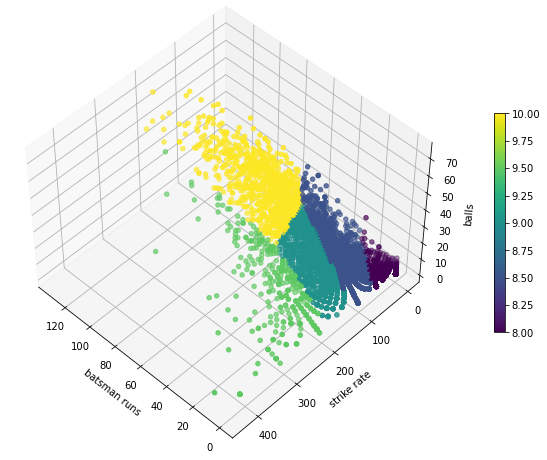

In [ ]:
from mpl_toolkits.mplot3d import Axes3D                   #plotting the clustering output
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('batsman runs')
ax.set_ylabel('strike rate')
ax.set_zlabel('balls')

y=ax.scatter(X[:, 0], X[:, 2], X[:, 1], c= points)
cbar=plt.colorbar(y,pad=0.10,fraction=0.02,shrink=50.0)


In [ ]:
df_new

,batsman,home_team,opposition_team,venue,inning,match_id,batsman_runs,sixes,fours,half_century,century,zeros,balls,strike_rate,rating,Points
0,A Chopra,Kolkata Knight Riders,Royal Challengers Bangalore,Eden Gardens,1,29,2,0,0,0,0,0,5,40.000000,8.0,8.0
1,A Chopra,Kolkata Knight Riders,Deccan Chargers,"Rajiv Gandhi International Stadium, Uppal",1,32,24,0,3,0,0,0,25,96.000000,8.5,8.5
2,A Chopra,Kolkata Knight Riders,Delhi Daredevils,Eden Gardens,1,35,13,0,2,0,0,0,18,72.222222,8.5,8.5
3,A Chopra,Kolkata Knight Riders,Mumbai Indians,Wankhede Stadium,1,38,1,0,0,0,0,0,4,25.000000,8.0,8.0
4,A Chopra,Kolkata Knight Riders,Kings XI Punjab,Eden Gardens,2,51,2,0,0,0,0,0,3,66.666667,8.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Yuvraj Singh,Kings XI Punjab,Royal Challengers Bangalore,M.Chinnaswamy Stadium,1,677,4,0,1,0,0,0,4,100.000000,8.5,8.5
4905,Yuvraj Singh,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",1,681,20,1,2,0,0,0,13,153.846154,9.0,9.0
4906,Yuvraj Singh,Kings XI Punjab,Delhi Daredevils,Feroz Shah Kotla,1,691,14,0,1,0,0,0,17,82.352941,8.5,8.5
4907,Yuvraj Singh,Kings XI Punjab,Mumbai Indians,Holkar Cricket Stadium,1,703,14,1,0,0,0,0,14,100.000000,8.5,8.5


# 